# Assignment 9: Phân cụm phổ (Spectral clustering)

Tổng quan: Ở bài tập này chúng ta sẽ thực hành bài Phân tích và khai phá mạng xã hội bằng phương pháp Phân cụm phổ. Nhiệm vụ của bạn là lập trình các hàm thực hiện các công việc: xây dựng đồ thị biểu diễn mạng xã hội, tính toán các ma trận, vector cần thiết và phân cụm được mạng xã hội.

Requirements:
    - Ngôn ngữ lập trình: Python 2
    - Các thư viện cần cài đặt: numpy, OpenCV 3.3, matplotlib, jupyter notebook.

In [10]:
import matplotlib.pyplot as plt
from IPython.display import Markdown
from IPython.display import Image

%matplotlib inline

# from spectral_clustering import *
from visualize import *
from sklearn.cluster import KMeans, SpectralClustering
import os

## Bài tập 1: Xây dựng đồ thị biểu diễn mạng xã hội
Trong bài tập này bạn được yêu cầu hoàn chỉnh hàm load_graph().

Hãy tưởng tượng bạn có thông tin của một mạng xã hội gồm n người và m mỗi quan hệ bạn bè. Trước hết bạn cần biểu diễn đồ thị mạng xã hội này dưới dạng một ma trận kề A (kích thước nxn). Trong đó:
\begin{align}{A(i,j) = }
    \begin{cases}
        1 & \text{Nếu hai người i và j là bạn bè}\\
        0 & \text{ngược lại}
    \end{cases}
\end{align}
Tiếp theo bạn cần tính toán ma trận bậc D (kích thước nxn) của đồ thị. Các giá trị trên đường chéo D(i, i) là giá trị bậc của đỉnh i. Cụ thể:
\begin{align}{D(i,j) = }
    \begin{cases}
        deg(i) & \text{Nếu i=j}\\
        0 & \text{ngược lại}
    \end{cases}
    \text{Với deg(i) - bậc của đỉnh i: là số  cạnh liên thuộc với i hay số hàng xóm/bạn bè của i}
\end{align}

Ở đây ta có một số đồ thị mẫu với kích thước từ nhỏ đến lớn để phù hợp cả việc kiểm tra tính đúng đắn trực quan cũng như khả năng xử lý với đồ thị lớn phức tạp. Các thông tin của các đồ thị này được lưu trong các file [graph_name].txt với cùng định dạng như sau:
    
- Dòng đầu gồm 3 số n, m, k tương ứng là số đỉnh, số cạnh, và số cụm cần phân ra.
- m dòng tiếp theo, mỗi dòng chứa 2 số u, v biểu diễn rằng có cạnh nối giữa 2 đỉnh u và v. Các đỉnh của đồ thị được đánh số từ 0 đến n-1.

*Lưu ý rằng trên thực tế bài toán tìm số cụm k của một đồ thị cũng sẽ quyết định tới kết quả của các bài phân cụm nói chung. Ở đây để thực hành xây dựng thuật toán bạn sẽ được cho biết số cụm k này.*

Nhiệm vụ của bạn là lập trình hàm load_graph nhận đầu vào là đường dẫn tới file graph, đầu ra sẽ gồm n, k, adj_mat, deg_mat tương ứng là số đỉnh, số cụm, ma trận kề và ma trận bậc.

In [11]:
def load_graph(file_path):
    """ Loads a graph from a file path
        Args:
            file_path: file path to the image
        Returns:
            n: number of vertices
            adj_mat: Adjacency matrix of graph
                    numpy int array of shape(n, n)
            deg_mat: Degree matrix of graph
                    numpy int diagonal array of shape(n, n)
    """

    n = None
    k = None
    adj_mat = None
    deg_mat = None

    ### YOUR CODE HERE ###

    pass
    
    ### END YOUR CODE ####
            
    return n, k, adj_mat, deg_mat

In [12]:
graph_name = 'graph10'
n, k, A, D = load_graph(graph_name +'.txt')

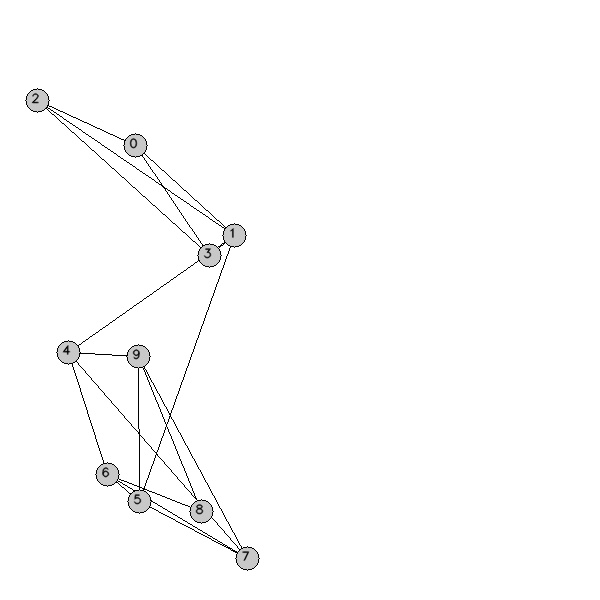

In [13]:
Image('graph10.jpg')

In [14]:
A

In [15]:
D

Tiếp theo ta dễ dàng tính toán Ma trận Laplacian L, ma trận này sẽ được dùng để tính toán các giá trị trị riêng và vector riêng cho phần sau của thuật toán. Theo định nghĩa L = D - A

In [16]:
L = D - A
L

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

## Bài tập 2

Trong bài tập này bạn được yêu cầu hoàn chỉnh hàm eigen_sort().

Tính toán trị riêng (eigenvalue) và vector riêng (eigenvector) của Ma trận Laplacian. Sau đó sắp xếp lại các vector riêng này theo thứ tự không giảm của trị riêng.

*Gợi ý: có thể dùng hàm numpy.linalg.eig() để tính toán được vector riêng và trị riêng của một ma trận.*

Hàm này trả về eigval, và eigvec là các mảng chứa trị riêng và vector riêng sau khi sắp xếp


In [17]:
def eigen_sort(L):
    """ Calculate eigenvectors and their eigenvalue
        Sort in non-decreasing order by eigenvalue
        Args:
            L: Laplacian matrix of graph
        Returns:
            w: eigenvalues
            v: eigenvectors
    """

    w = None
    v = None

    ### YOUR CODE HERE ###

    pass
    
    ### END YOUR CODE ####

    return w, v

## Bài tập 3

Trong bài tập này bạn được yêu cầu hoàn chỉnh hàm recursive_bi_partition() và kmeans_spectral_clustering(). 
Hàm này nhận vào 2 tham số eigvec và k tương ứng là mảng các vector riêng và số cụm k cần phân ra. Bạn cần lập trình trả về một mảng gồm n phần tử tương ứng với nhãn của n đỉnh trong đồ thị. Nhãn này sẽ được gán trong khoảng 0 -> k-1 tương ứng với k cụm.

Hint:
- C1: dùng 1 vector riêng để chia làm 2 cụm, sau đó đệ quy tiếp trên 2 tập nhỏ
- C2: hàm recursive_bi_partition() - dùng log2(k) vector để chia cụm
- C3: hàm kmeans_spectral_clustering() - dùng kmeans để chia cụm

### Phân cụm dùng nhiều vector riêng

In [18]:
def recursive_bi_partition(v, k):
    """ Recursive bi-partition
        Args:
            v: eigenvectors
            k: number of clusters
        Returns:
            label: result clustering
    """

    label = None
    
    ### YOUR CODE HERE ###

    pass
    
    ### END YOUR CODE ####

    return label

In [19]:
graph_name = 'graph40'
n, k, A, D = load_graph(graph_name +'.txt')
L = D - A
eigval, eigvec = eigen_sort(L)
label = recursive_bi_partition(eigvec, k)
out = visualize(graph_name, label)

Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

Đoạn code trên sẽ giúp bạn Visualize được đồ thị và kết quả phân cụm. Ta sẽ thử với các đồ thị còn lại.

In [20]:
def test_recursive(graph_name):
    n, k, A, D = load_graph(graph_name +'.txt')
    L = D - A
    eigval, eigvec = eigen_sort(L)
    label = recursive_bi_partition(eigvec, k)
    out = visualize(graph_name, label)

In [21]:
graph_name = 'graph30'
test_recursive(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [22]:
graph_name = 'graph80'
test_recursive(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [23]:
graph_name = 'graph100'
test_recursive(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [24]:
graph_name = 'graph500'
test_recursive(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

### Phân cụm dùng kmeans trên tập k vector riêng

In [25]:
def kmeans_spectral_clustering(v, k):
    """ Use kmeans
        Args:
            v: eigenvectors
            k: number of clusters
        Returns:
            label: result clustering
    """

    label = None

    ### YOUR CODE HERE ###

    pass
    
    ### END YOUR CODE ####

    return label

In [26]:
graph_name = 'graph40'
n, k, A, D = load_graph(graph_name +'.txt')
L = D - A
eigval, eigvec = eigen_sort(L)
label = kmeans_spectral_clustering(eigvec, k)
out = visualize(graph_name, label)

Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

Đoạn code trên sẽ giúp bạn Visualize được đồ thị và kết quả phân cụm. Ta sẽ thử với các đồ thị còn lại.

In [27]:
def test_kmeans(graph_name):
    n, k, A, D = load_graph(graph_name + '.txt')
    L = D - A
    eigval, eigvec = eigen_sort(L)
    label = kmeans_spectral_clustering(eigvec, k)
    out = visualize(graph_name, label)

In [28]:
graph_name = 'graph30'
test_kmeans(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [29]:
graph_name = 'graph80'
test_kmeans(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [30]:
graph_name = 'graph100'
test_kmeans(graph_name)
Image(graph_name + '.jpg')

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [ ]:
graph_name = 'graph500'
test_kmeans(graph_name)
Image(graph_name + '.jpg')

### So sánh kết quả với hàm từ thư viện sklearn.cluster.SpectralClustering

In [48]:
graph_name = 'graph100'
n, k, A, D = load_graph(graph_name +'.txt')
L = D - A
sc = SpectralClustering(n_clusters=k, affinity='precomputed')
sc

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=8, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

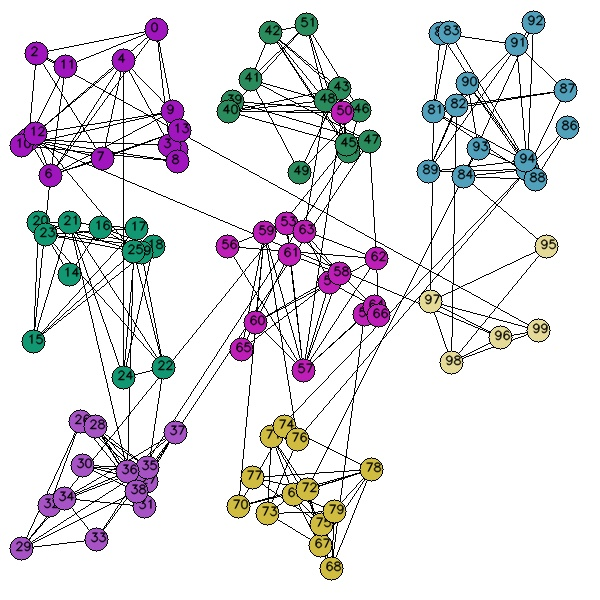

In [17]:
sc.fit(A)
label = sc.labels_
out = visualize(graph_name, label)

Image(graph_name + '.jpg')

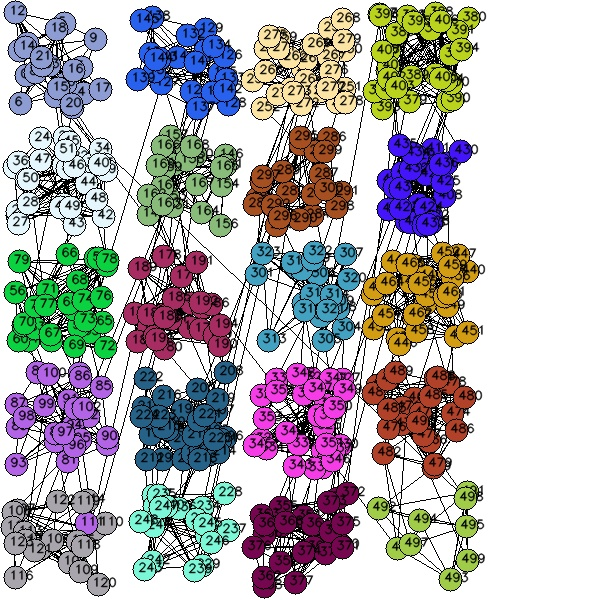

In [18]:
graph_name = 'graph500'
n, k, A, D = load_graph(graph_name +'.txt')
L = D - A
sc = SpectralClustering(n_clusters=k, affinity='precomputed')
sc.fit(A)
label = sc.labels_
out = visualize(graph_name, label)

Image(graph_name + '.jpg')